<a href="https://colab.research.google.com/github/adarshjha01/British-Airways-Review-Analysis/blob/main/BritishAirways_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Web Scrapping



In [2]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 20
page_size = 100

reviews = []

for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())

    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews
Scraping page 11
   ---> 1100 total reviews
Scraping page 12
   ---> 1200 total reviews
Scraping page 13
   ---> 1300 total reviews
Scraping page 14
   ---> 1400 total reviews
Scraping page 15
   ---> 1500 total reviews
Scraping page 16
   ---> 1600 total reviews
Scraping page 17
   ---> 1700 total reviews
Scraping page 18
   ---> 1800 total reviews
Scraping page 19
   ---> 1900 total reviews
Scraping page 20
   ---> 2000 total reviews


In [6]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,✅ Trip Verified | On a recent flight from Cy...
1,✅ Trip Verified | Flight BA 0560 arrived in ...
2,✅ Trip Verified | This was the first time I ...
3,✅ Trip Verified | Pretty good flight but sti...
4,"✅ Trip Verified | Check in was fine, but no pr..."


In [7]:
df.to_csv("data/BA_reviews.csv")

# Data Cleaning

In [9]:
data = pd.DataFrame()
data["reviews"] = reviews

# Remove "✅ Trip Verified |" from the reviews column
data["reviews"] = data["reviews"].str.replace("✅ Trip Verified |", "", regex=False)

# Save the cleaned data to a CSV file
data.to_csv("data/BA_reviews.csv", index=False)

# Preview the cleaned DataFrame
print(data.head())

                                             reviews
0     On a recent flight from Cyprus BA621 on 23/...
1     Flight BA 0560 arrived in Rome on 11 Decemb...
2     This was the first time I flew British Airw...
3     Pretty good flight but still some small thi...
4   Check in was fine, but no priority/fast track...


In [10]:
# Strip unnecessary whitespaces
data['reviews'] = data['reviews'].str.strip()
data['reviews'] = data['reviews'].str.lower()
# Save the cleaned data to a CSV file
data.to_csv("data/BA_reviews.csv", index=False)

# Preview the cleaned DataFrame
print(data.head())

                                             reviews
0  on a recent flight from cyprus ba621 on 23/11/...
1  flight ba 0560 arrived in rome on 11 december ...
2  this was the first time i flew british airways...
3  pretty good flight but still some small things...
4  check in was fine, but no priority/fast track ...


# Tokenization and Stopwords removal

In [14]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Download 'punkt_tab' for sentence tokenization
nltk.download('punkt')  # For tokenization
nltk.download('stopwords')  # For stop words
nltk.download('punkt_tab')  # Download punkt_tab for sentence tokenization

# Load the English stop words
stop_words = set(stopwords.words('english'))

# Tokenize and remove stop words
def preprocess_review(reviews):
    tokens = word_tokenize(reviews)  # Tokenization
    tokens = [word for word in tokens if word.lower() not in stop_words]  # Remove stop words
    return tokens

# Apply the function to the 'reviews' column
data['reviews_tokens'] = data['reviews'].apply(preprocess_review)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


# Sentiment Analysis

In [15]:
from textblob import TextBlob

# Calculate sentiment
def get_sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return "Positive"
    elif analysis.sentiment.polarity == 0:
        return "Neutral"
    else:
        return "Negative"

df["sentiment"] = df["reviews"].apply(get_sentiment)

# Topic modelling using Bag of words

In [20]:
from sklearn.feature_extraction.text import CountVectorizer
from gensim.models.ldamodel import LdaModel
from gensim import corpora

# Create BoW representation
vectorizer = CountVectorizer(max_df=0.9, min_df=2, stop_words='english')
X = vectorizer.fit_transform(df["reviews"])

# Define the dictionary first
dictionary = corpora.Dictionary([text.split() for text in df["reviews"]])

# Now create the corpus using the defined dictionary
corpus = [dictionary.doc2bow(text.split()) for text in df["reviews"]]


# Train LDA model
lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=5, random_state=42)
topics = lda_model.print_topics(num_words=5)
for topic in topics:
    print(topic)

(0, '0.048*"the" + 0.033*"and" + 0.027*"to" + 0.019*"a" + 0.018*"was"')
(1, '0.035*"to" + 0.029*"and" + 0.023*"the" + 0.022*"was" + 0.021*"a"')
(2, '0.040*"the" + 0.030*"to" + 0.024*"and" + 0.020*"a" + 0.020*"was"')
(3, '0.039*"the" + 0.034*"to" + 0.026*"and" + 0.016*"a" + 0.015*"was"')
(4, '0.043*"the" + 0.036*"to" + 0.028*"I" + 0.023*"and" + 0.022*"was"')


# Data Visualization

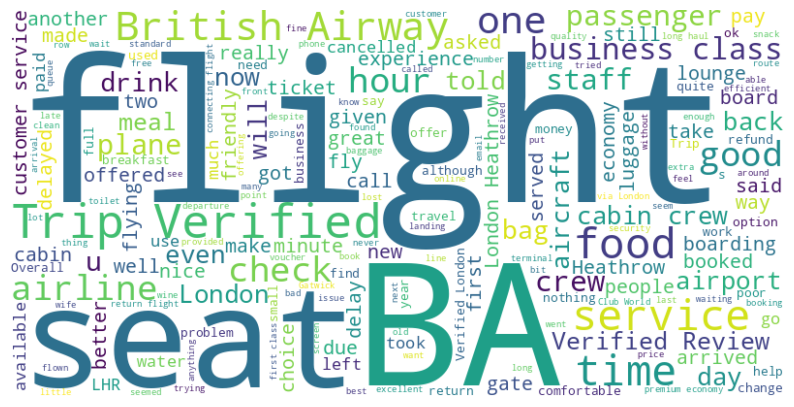

In [22]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Generate WordCloud
text = " ".join(review for review in df["reviews"])
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)

# Plot WordCloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

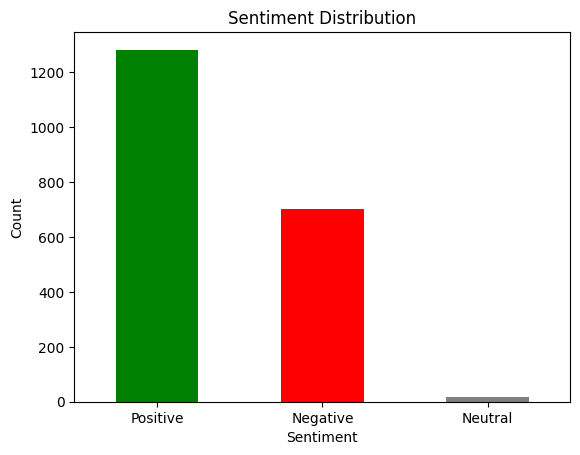

Sentiment Distribution (Counts and Percentages):
           Count  Percentage
sentiment                   
Positive    1283       64.15
Negative     701       35.05
Neutral       16        0.80
                                               Topic
0  (0, 0.048*"the" + 0.033*"and" + 0.027*"to" + 0...
1  (1, 0.035*"to" + 0.029*"and" + 0.023*"the" + 0...
2  (2, 0.040*"the" + 0.030*"to" + 0.024*"and" + 0...
3  (3, 0.039*"the" + 0.034*"to" + 0.026*"and" + 0...
4  (4, 0.043*"the" + 0.036*"to" + 0.028*"I" + 0.0...


In [25]:
# # Sentiment Distribution
# df["sentiment"].value_counts().plot(kind='bar', title='Sentiment Distribution')
# plt.show()

# # Topic Distribution
# topics_df = pd.DataFrame({"Topic": topics})
# print(topics_df)
import matplotlib.pyplot as plt
import pandas as pd

# Sentiment Distribution
sentiment_counts = df["sentiment"].value_counts()
sentiment_percentages = sentiment_counts / sentiment_counts.sum() * 100

# Plot sentiment distribution with percentages
sentiment_counts.plot(kind='bar', title='Sentiment Distribution', color=['green', 'red', 'gray'])
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

# Display sentiment counts and percentages
sentiment_distribution = pd.DataFrame({
    'Count': sentiment_counts,
    'Percentage': sentiment_percentages
})

print("Sentiment Distribution (Counts and Percentages):")
print(sentiment_distribution)

# Topic Distribution
topics_df = pd.DataFrame({"Topic": topics})
print(topics_df)

In [24]:
df.to_csv("cleaned_reviews_with_sentiment.csv", index=False)